In [176]:
from sklearn.datasets import load_breast_cancer
info = load_breast_cancer()
info.target[[10, 50, 85]]
list(info.target_names)

['malignant', 'benign']

In [177]:
print(info.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# dataset info

In [178]:
personhealth=info.target[0]
person_illness=info.target[500]
print(person_illness)
print(personhealth)

1
0


In [179]:
info.target.shape

(569,)

In [180]:
info.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [181]:
info.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [182]:
info.data.shape

(569, 30)

# Preprocessing

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(info.data, info.target, test_size=0.2)

In [184]:
print(f"Feature train:{X_train.shape} - test:{X_test.shape}")
print(f"Label=> train:{y_train.shape} - test:{y_test.shape}")

Feature train:(455, 30) - test:(114, 30)
Label=> train:(455,) - test:(114,)


In [185]:
X_train[0]

array([1.927e+01, 2.647e+01, 1.279e+02, 1.162e+03, 9.401e-02, 1.719e-01,
       1.657e-01, 7.593e-02, 1.853e-01, 6.261e-02, 5.558e-01, 6.062e-01,
       3.528e+00, 6.817e+01, 5.015e-03, 3.318e-02, 3.497e-02, 9.643e-03,
       1.543e-02, 3.896e-03, 2.415e+01, 3.090e+01, 1.614e+02, 1.813e+03,
       1.509e-01, 6.590e-01, 6.091e-01, 1.785e-01, 3.672e-01, 1.123e-01])

In [186]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

x_train = scalar.fit_transform(X_train)
X_train = scalar.transform(X_train)

In [187]:
X_train[0]

array([0.60719403, 0.56679067, 0.60812667, 0.48350344, 0.37356685,
       0.46111318, 0.38823805, 0.37738569, 0.36625734, 0.27626119,
       0.31792487, 0.05436704, 0.29486768, 0.27130213, 0.11224802,
       0.30913637, 0.11510862, 0.2455564 , 0.10620814, 0.14267514,
       0.64365079, 0.50319829, 0.62043714, 0.50135518, 0.5265139 ,
       0.6128882 , 0.4865016 , 0.61340206, 0.50059397, 0.37557392])

# Classification

In [188]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

def calculate_metrics(y_train,y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    p = precision_score(y_true=y_test, y_pred=y_pred_test, zero_division=1)
    r = recall_score(y_true=y_test, y_pred=y_pred_test, zero_division=1)

    
    print (f"acc train: {acc_train} - acc test:-{acc_test}- precision: {p}-racall:{r}")
    
    return acc_train, acc_test,p , r

# 1.Naive bayes

In [189]:
from sklearn.naive_bayes import GaussianNB

gnb= GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [190]:
y_pred_train= gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9472527472527472 - acc test:-0.35964912280701755- precision: 1.0-racall:0.0


# 2.KNN

In [191]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree',leaf_size=28)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [192]:
y_pred_train= knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9802197802197802 - acc test:-0.35964912280701755- precision: 1.0-racall:0.0


# decision tree

In [193]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=64)

In [194]:
y_pred_train= dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test:-0.7192982456140351- precision: 0.9555555555555556-racall:0.589041095890411


# 4.Random Forest

In [195]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=1000, max_depth=32, min_samples_split=4)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=1000)

In [196]:
y_pred_train= rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9978021978021978 - acc test:-0.35964912280701755- precision: 1.0-racall:0.0


# 5.SVM

In [197]:
from sklearn.svm import SVC

svm= SVC(kernel='poly')
svm.fit(x_train, y_train)


SVC(kernel='poly')

In [198]:
y_pred_train= svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9934065934065934 - acc test:-0.35964912280701755- precision: 1.0-racall:0.0


#  6.Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression

lr  = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [200]:
y_pred_train= svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9934065934065934 - acc test:-0.35964912280701755- precision: 1.0-racall:0.0


## 7.ANN

In [201]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=1024, activation='tanh', solver='adam', batch_size=64)
ann.fit(X_train, y_train) 

MLPClassifier(activation='tanh', batch_size=64, hidden_layer_sizes=1024)

In [202]:
y_pred_train= ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9934065934065934 - acc test:-0.35964912280701755- precision: 1.0-racall:0.0


# Comparison

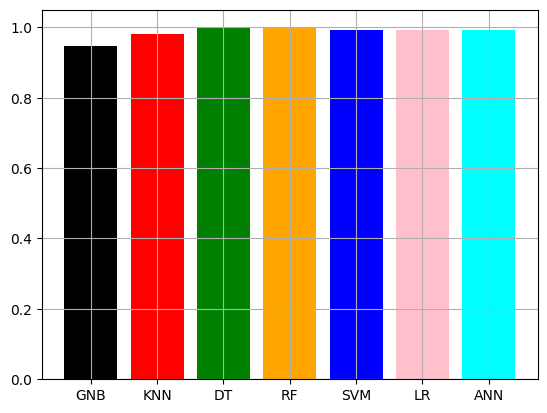

In [203]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr,acc_train_ann]
title = ["GNB",'KNN','DT','RF','SVM','LR','ANN']
colors=['black','red','green','orange','blue','pink','cyan']

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

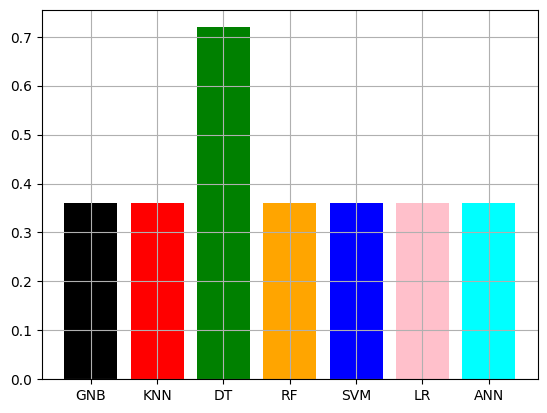

In [204]:
import matplotlib.pyplot as plt
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr,acc_test_ann]
title = ["GNB",'KNN','DT','RF','SVM','LR','ANN']
colors=['black','red','green','orange','blue','pink','cyan']

plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

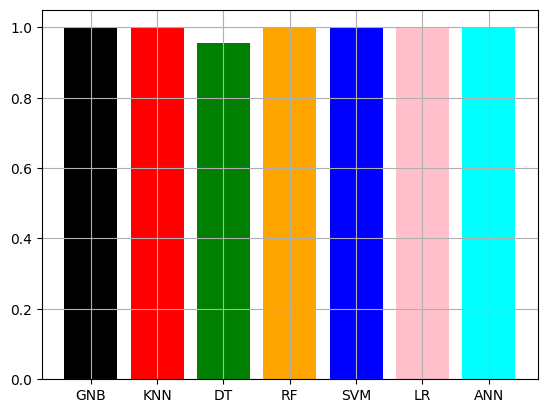

In [205]:
import matplotlib.pyplot as plt
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB",'KNN','DT','RF','SVM','LR','ANN']
colors=['black','red','green','orange','blue','pink','cyan']

plt.bar(title, p, color=colors)
plt.grid()
plt.show()

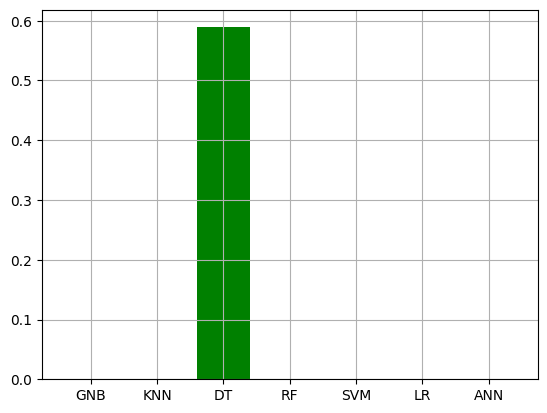

In [206]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'red', 'green', 'orange', 'blue', 'pink', 'cyan']

plt.bar(title, r, color=colors)
plt.grid()
plt.show()
